In [13]:
import pandas as pd
import numpy as np

In [14]:
#set date column as index and telling pandas to treat date as index and not string 
df=pd.read_csv('MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True) 
#drop missing value
df=df.dropna() 
#number of rows and columns
print('Shape of data',df.shape) 
df.head(4)

Shape of data (1821, 6)


,SN,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,,
2014-01-01,1,33.0,46.0,40.0,657,1756
2014-01-02,2,35.0,50.0,43.0,657,1756
2014-01-03,3,36.0,45.0,41.0,657,1757
2014-01-04,4,32.0,41.0,37.0,658,1757


<AxesSubplot:xlabel='DATE'>

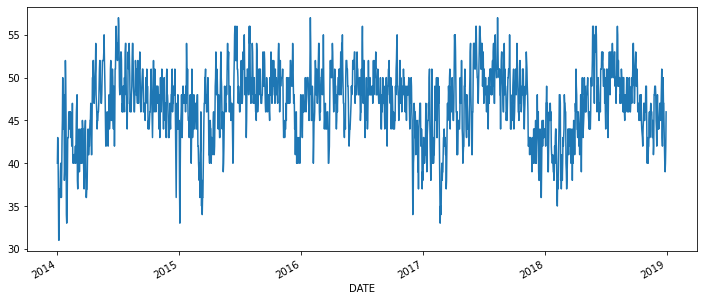

In [15]:
#plotting data with plot ration of 12 to 5
dataset=df['AvgTemp']
#df['AvgTemp'].plot(figsize=(10,5))
dataset.plot(figsize=(12,5))

In [16]:
#checing for stationarity
from statsmodels.tsa.stattools import adfuller
dataset=df['AvgTemp']
dftest = adfuller(dataset, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

if dftest[1] <0.05:
    print('as the datasets p value:',dftest[1],' is less than 0.05, the dataset is stationary')
#if p value <0.05, then data is stationary

1. ADF :  -6.554680125068782
2. P-Value :  8.675937480199415e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872
as the datasets p value: 8.675937480199415e-09  is less than 0.05, the dataset is stationary


In [17]:
#finding ARIMA model 
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(df['AvgTemp'],Trace=True, suppress_warnings=True)     
#the goal is to minimize AIC
#if it takes too long to converge, you can specify the starting p,d,q values and its lower ang upper bound 
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.283
Date:                Mon, 25 Oct 2021   AIC                           8294.566
Time:                        22:18:17   BIC                           8338.623
Sample:                             0   HQIC                          8310.820
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2004      0.361      3.324      0.001       0.493       1.908
ar.L1          0.9742      0.008    125.341      0.000       0.959       0.989
ma.L1         -0.1238      0.024     -5.251      0.000      -0.170      -0.078
ma.L2         -0.2203      0.024     -9.184      0.000      -0.267      -0.173
ma.L3         -0.2028      0.024     -8.529      0.000      -0.249      -0.156
ma.L4         -0.1377      0.023     -6.077      0.000      -0.182      -0.093
ma.L5         -0.0525      0.024     -2.162      0.031      -0.100      -0.005
sigma2         5.4769      0.171     32.071      0.000       5.142       5.812
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                20.33
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
#now the value of p,d,q is obtained, we can start fitting the model
#Split Data into Training and Testing

print(df.shape)
train=df.iloc[:-30]  #rest other data rows for training
test=df.iloc[-30:] #keeping last 30 rows value for testing
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(1821, 6)
(1791, 6) (30, 6)


In [19]:
#training
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1,0,5)) #choosing column of AvgTemp for training except last 30 days
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                     ARMA(1, 5)   Log Likelihood               -4070.198
Method:                       css-mle   S.D. of innovations              2.347
Date:                Mon, 25 Oct 2021   AIC                           8156.395
Time:                        22:18:18   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5857      0.785     59.355      0.000      45.047      48.124
ar.L1.AvgTemp     0.9856      0.007    150.630      0.000       0.973       0.998
ma.L1.AvgTemp    -0.1412      0.025     -5.735      0.000      -0.190      -0.093
ma.L2.AvgTemp    -0.2268      0.024     -9.295      0.000      -0.275      -0.179
ma.L3.AvgTemp    -0.2168      0.026     -8.416      0.000      -0.267      -0.166
ma.L4.AvgTemp    -0.1479      0.023     -6.300      0.000      -0.194      -0.102
ma.L5.AvgTemp    -0.0594      0.025     -2.411      0.016      -0.108      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0146           +0.0000j            1.0146            0.0000
MA.1            1.0883           -0.0000j            1.0883           -0.0000
MA.2            0.0555           -1.8423j            1.8431           -0.2452
MA.3            0.0555           +1.8423j            1.8431            0.2452
MA.4           -1.8432           -1.0734j            2.1330           -0.4161
MA.5           -1.8432           +1.0734j            2.1330            0.4161
-----------------------------------------------------------------------------
"""

2018-12-01    44.754155
2018-12-02    44.987875
2018-12-03    45.388840
2018-12-04    45.721642
2018-12-05    45.863820
2018-12-06    45.874216
2018-12-07    45.884462
2018-12-08    45.894560
2018-12-09    45.904514
2018-12-10    45.914323
2018-12-11    45.923992
2018-12-12    45.933521
2018-12-13    45.942913
2018-12-14    45.952170
2018-12-15    45.961294
2018-12-16    45.970286
2018-12-17    45.979148
2018-12-18    45.987883
2018-12-19    45.996493
2018-12-20    46.004978
2018-12-21    46.013341
2018-12-22    46.021583
2018-12-23    46.029707
2018-12-24    46.037714
2018-12-25    46.045606
2018-12-26    46.053383
2018-12-27    46.061049
2018-12-28    46.068605
2018-12-29    46.076052
2018-12-30    46.083391
Freq: D, Name: ARIMA testing, dtype: float64


<AxesSubplot:xlabel='DATE'>

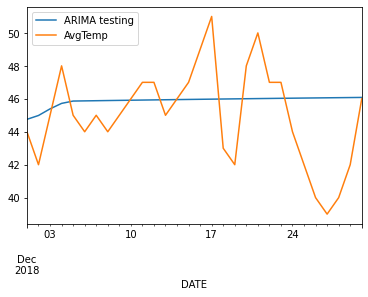

In [20]:
#testing , how good is model
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA testing')

#if indexing is not in terms of date and we want in it terms of date, then we have explicity tell it
index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred.index=index_future_dates
print(pred)
pred.plot(legend=True)   
test['AvgTemp'].plot(legend=True)

In [21]:
#checking the fit correctness using rmse value
test['AvgTemp'].mean()

45.0

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

#if the rmse is less than mean value, i.e. 1e1 in 1e100, then its good fit
#here its 3e0 in 4.5e1

3.0004985248360057


In [23]:
#fitting for entire date, not just testing data
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,SN,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,,
2018-12-26,1821,35.0,45.0,40.0,654,1752
2018-12-27,1822,33.0,44.0,39.0,655,1752
2018-12-28,1823,33.0,47.0,40.0,655,1753
2018-12-29,1824,36.0,47.0,42.0,655,1753
2018-12-30,1825,39.0,52.0,46.0,656,1754


In [24]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29') #creating dates after dec till jan
#print(index_future_dates)
#predicting for next 30 days i.e. after dec, till jan,
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    46.418065
2018-12-31    46.113783
2019-01-01    45.617773
2019-01-02    45.249556
2019-01-03    45.116986
2019-01-04    45.136772
2019-01-05    45.156282
2019-01-06    45.175518
2019-01-07    45.194484
2019-01-08    45.213185
2019-01-09    45.231624
2019-01-10    45.249805
2019-01-11    45.267731
2019-01-12    45.285405
2019-01-13    45.302832
2019-01-14    45.320015
2019-01-15    45.336958
2019-01-16    45.353663
2019-01-17    45.370133
2019-01-18    45.386373
2019-01-19    45.402386
2019-01-20    45.418174
2019-01-21    45.433741
2019-01-22    45.449090
2019-01-23    45.464224
2019-01-24    45.479146
2019-01-25    45.493859
2019-01-26    45.508366
2019-01-27    45.522670
2019-01-28    45.536773
2019-01-29    45.550678
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

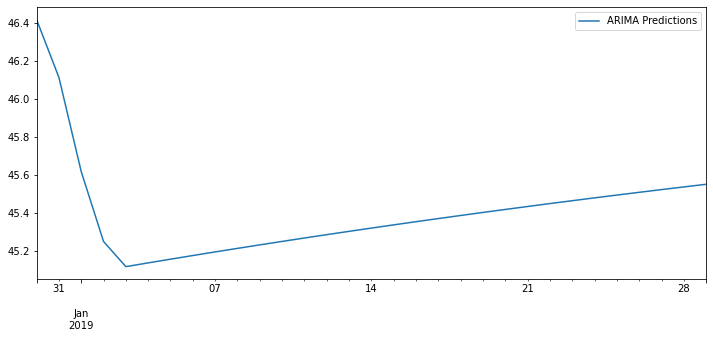

In [25]:
pred.plot(figsize=(12,5),legend=True)